In [159]:
from scipy.stats import *
import pandas as pd
import numpy as np

def x(df,a=0.05):
    s=0
    b=len(df.iloc[:])-1
    c=len(df.iloc[0,:])-1
    for i in range(b):
        for j in range(c):
            e=df.iloc[b,c]*(df.iloc[i,c]/df.iloc[b,c])*(df.iloc[b,j]/df.iloc[b,c])
            s=s+(df.iloc[i,j]-e)**2/e
    print("检验统计量为{:.4f}".format(s))
    x_2=chi2.ppf(1-a,(b-1)*(c-1))
    print("检验核计量为{:.4f}".format(x_2))
    if s>=x_2:
        print("拒绝原假设")
    else:
        print("接受原假设")
    p=1-chi2.cdf(s,(b-1)-)*(c-1)
    print("p值为{:.4f}".format(p))
                       
data=np.array([[144,36,150],
               [132,18,150],
              [246,54,300]])
head=["存活数","死亡数","合计"]
body=["对照","新措施","合计"]
df=pd.DataFrame(data,index=body,columns=head)
x(df)

检验统计量为10.2439
检验核计量为3.8415
拒绝原假设
p值为nan


游程总数为： 13
拒绝域为R<=6或R>=14
这组数据符合抽取原则
p值为0.6779233150750179
这组数据符合抽取原则
拒绝域为R<=5.5612或R>=15.2388
这组数据符合抽取原则


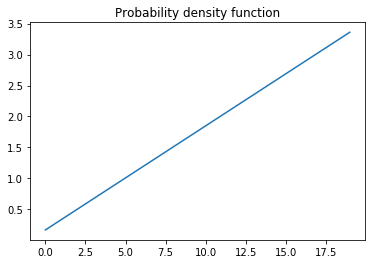

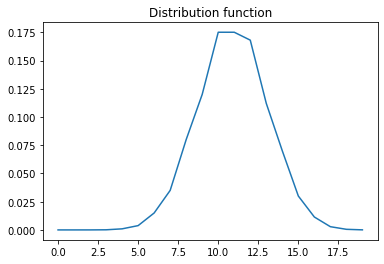

In [2]:
from scipy.special import comb
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt

def R(k,n1,n2):
    if k%2==0:
        k=k//2
        p=2*comb(n1-1,k-1)*comb(n2-1,k-1)/comb(n1+n2,n1)
    else:
        k=k//2
        p=(comb(n1-1,k-1)*comb(n2-1,k)+comb(n1-1,k)*comb(n2-1,k-1))/comb(n1+n2,n1)
    return p

def run_test(lis,a=0.05):
    lis.insert(0,2)
    m=np.median(lis)
    x,y,z=0,0,0
    for i in range(1,len(lis)):
        if lis[i]<m:
            lis[i]=0
            x=x+1
        else:
            lis[i]=1
            y=y+1
        if lis[i-1]!=lis[i]:
            z=z+1
    print("游程总数为：",z)
    #游程检验
    p1,i=0,1
    while p1<a/2:
        i=i+1
        p1=p1+R(i,x,y)
    p2,j=1,x+y
    while 1-p2<a/2:
        j=j-1
        p2=p2-R(j,x,y)
    print("拒绝域为R<={}或R>={}".format(i-1,j-1))
    if(z<=i-1 or z>=j+1):
        print("这组数据不符合抽取原则")
    else:
        print("这组数据符合抽取原则")        
    #p值检验
    p,p1=0,0
    for i in range(z):
        p1=p1+R(i,x,y)
    p=2*min(p1,1-(p1-R(z,x,y)))
    print("p值为{}".format(p))
    if p>=a:
        print("这组数据符合抽取原则") 
    else:
        print("这组数据不符合抽取原则")
    #渐进分布
    c1=2*x*y*(1+norm.ppf(a/2)/(x+y)**0.5)/(x+y)
    c2=2*x*y*(1+norm.ppf(1-a/2)/(x+y)**0.5)/(x+y)+1
    print("拒绝域为R<={:.4f}或R>={:.4f}".format(c1,c2))
    if(z<=c1 or z>=c2):
        print("这组数据不符合抽取原则")
    else:
        print("这组数据符合抽取原则") 
    m=[]
    n=[]
    b=0
    for t in range(20):
        m.append(R(t,x,y))
        b=b+R(i,x,y)
        n.append(b)
    t=[x for x in range(20)]
    plt.plot(t,n)
    plt.title("Probability density function")
    plt.show()
    plt.plot(t,m)
    plt.title("Distribution function")
    plt.show()
        
data=[156,255.5,132,246.7,867.9,86.4,610.4,125.7,150.4,117.6,201.9,207.2,189.8,585.8,153.1,565.4,511,567,222.3,141.5]
run_test(data)

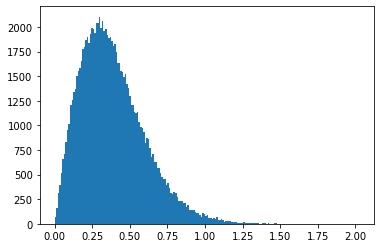

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def q(r,f):
    x=np.random.normal(0,1,r)
    y=np.random.chisquare(f)
    q=(max(x)-min(x))/y**0.5
    return q
p=[]    
for i in range(10**5):
    p.append(q(3,21))
plt.hist(p,200)
plt.show()


In [55]:
import scipy.stats as st

x=[142.08,177.30,204.68,242.68,316.24,341.99,332.69,389.29,453.40]
y=[3.93,5.96,7.85,9.82,12.50,15.55,15.79,16.39,18.45]
y1=0.04867189*300-2.2582169
s_t1,s_t2,s_a1,s_a2=0,0,0,0
for i in range(len(x)):
    s_t1=x[i]**2+s_t1
    s_a1=x[i]+s_a1
s_a1=s_a1/len(x)
lxx=s_t1-len(x)*s_a1**2
for j in range(len(y)):
    s_t2=y[j]**2+s_t2
    s_a2=y[j]+s_a2
s_a2=s_a2/len(y)
lyy=s_t2-len(y)*s_a2**2
s_e=(lyy-0.04867189**2*lxx)/(sum(x)+sum(y)-2)
print(lxx)
theta=st.norm.ppf(0.975)*s_e
a=y1-theta
b=y1+theta
n=[a,b]
print(n)

85861.95215555537
[12.337606640980301, 12.349093559019703]


In [43]:
from sklearn import linear_model
x=[[142.08],[177.30],[204.68],[242.68],[316.24],[341.99],[332.69],[389.29],[453.40]]
y=[[3.93],[5.96],[7.85],[9.82],[12.50],[15.55],[15.79],[16.39],[18.45]]
clf = linear_model.LinearRegression()
clf.fit(x,y)
print(clf.coef_,clf.intercept_)
print(clf.score(x,y))
y_pred =clf.predict([[300]])
print(y_pred)

[[0.04867189]] [-2.2582169]
0.9624967903099556
[[12.34335044]]


In [51]:
import scipy.stats as st

st.norm.ppf(0.975)

1.959963984540054

In [51]:
import pandas as pd
import numpy as np
import math as m
from math import e
n=[57,203,383,525,532,408,273,139,45,27,10,6]
x,y=0,0
for i in range(len(n)):
    x=i*n[i]+x
    y=n[i]+y
x=x/y
a=[]
b=[]
p=[]
npi=[]
x2=[]
for i in range(len(n)):
    a.append(i)
    b.append(i+1)
    p.append(x**i/m.factorial(i)*e**(-x))
    npi.append(p[i]*sum(n))
    x2.append((n[i]-npi[i])**2/(sum(n)*p[i]))
a.append('总和')
b.append('')
n.append(sum(n))
p.append(sum(p))
npi.append(sum(npi))
x2.append(sum(x2))
s=np.array([b,a,n,p,npi,x2])
s=s.T
name=['序号数i','质点数','观测数ni','概率估计pi','期望观测数n*pi','(ni-npi)**2/npi']
df=pd.DataFrame(s,columns=name)
print(df)

   序号数i 质点数 观测数ni                 概率估计pi           期望观测数n*pi  \
0     1   0    57   0.020866048765899384  54.418655181465596   
1     2   1   203    0.08074392796988365  210.58016414545656   
2     3   2   383    0.15622463977608625  407.43386053603297   
3     4   3   525    0.20151061664369407   525.5396882067541   
4     5   4   532    0.19494297768099697   508.4112857920401   
5     6   5   408    0.15087151309483293   393.4729061513243   
6     7   6   273    0.09730287002511849  253.76588502550902   
7     8   7   139    0.05378946999854818  140.28293775621367   
8     9   8    45   0.026018181136184256   67.85541640316853   
9    10   9    27    0.01118675375027145   29.17505378070794   
10   11  10    10   0.004328861919008416  11.289671884773949   
11   12  11     6  0.0015228274709506737  3.9715340442393567   
12       总和  2608     0.9993086882314747   2606.197058907686   

          (ni-npi)**2/npi  
0     0.12244589745841199  
1      0.2728599282142072  
2      1.4653017299

In [41]:
from math import e
import math as m
import numpy as np
a=[1]
b=[2]
c=[a,b]
np.array(c)

array([[1],
       [2]])

In [2]:
from scipy.stats import *

x=[1450,1480,1640,1610,1500,1600,1420,1530,1700,1550]
ttest=ttest_1samp(x,1600)
print(ttest)

Ttest_1sampResult(statistic=-1.8467035228604758, pvalue=0.09786286592018836)
